image A:


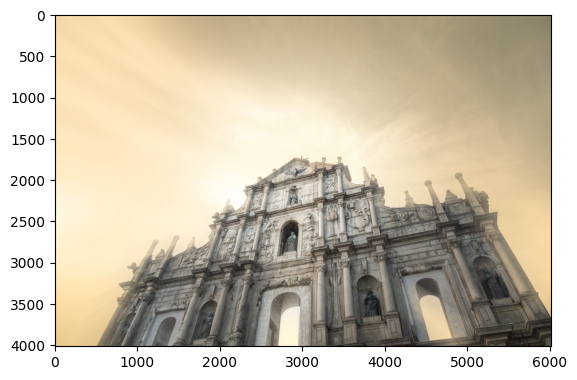

image B:


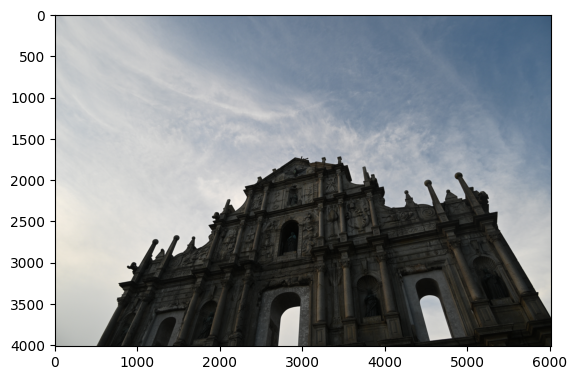

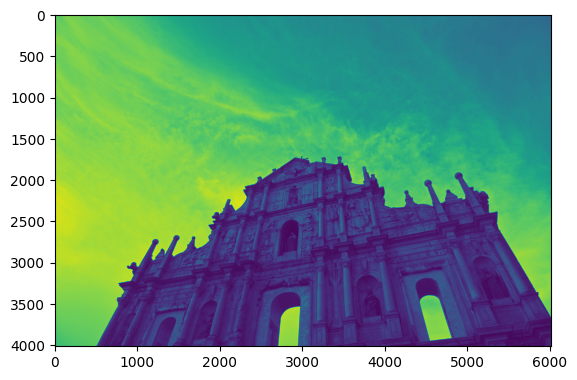

The mutual information is: 2.1639414076587067


In [28]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def compute_probability_distribution(image):
    # Flatten the image to a 1D array of intensity values
    intensity_values = image.flatten()
    # Calculate the probability of each intensity level
    histogram, _ = np.histogram(intensity_values, bins=10000, range=(0, 10000), density=True)
    return histogram

def mutual_information(imageA, imageB):
    # Compute the probability distribution of each image
    pA = compute_probability_distribution(imageA)
    pB = compute_probability_distribution(imageB)
    
    # Compute the joint probability distribution of both images
    joint_histogram, _, _ = np.histogram2d(imageA.flatten(), imageB.flatten(), bins=10000, range=((0, 10000), (0, 10000)), density=True)
    
    # Calculate the mutual information
    mi = 0
    for i in range(10000):
        for j in range(10000):
            if joint_histogram[i, j] > 0 and pA[i] > 0 and pB[j] > 0:
                mi += joint_histogram[i, j] * np.log2(joint_histogram[i, j] / (pA[i] * pB[j]))
    
    return mi


def load_image_with_opencv(file_path, size=None):
    # Read the image file
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image if a size is provided
    if size is not None:
        img = cv2.resize(img, size)
    return img

print("image A:")
imageA=Image.open('img/1-1.jpg')
plt.imshow(imageA)
plt.show()

print("image B:")
imageB=Image.open('img/1-2.jpg')
plt.imshow(imageB)
plt.show()

imageA = load_image_with_opencv('img/1-1.jpg', size=imageA.size)
imageB = load_image_with_opencv('img/1-2.jpg', size=imageB.size)

# Compute mutual information
mi = mutual_information(imageA, imageB)
print(f"The mutual information is: {mi}")
#imageB1 = load_image_with_opencv('dbdea13498bfaf4bf16faefc6f68f3e.jpg', size=size)
#mi1 = mutual_information(imageA, imageB1)
#print(f"The mutual information is: {mi1}")